# Fehleranalyse

## Den Code nach Fehlern durchgehen

Sie wollen die Anzahl an Mensaessen, die an einer fiktiven Mensa pro Semester komsumiert wurden grafisch darstellen und haben den folgenden Code geschrieben. Leider haben sich Fehler eingeschlichen. 
Der Code erzeugt zunächst die Daten für 30 verschiedene Semester und soll anschließen der Plot erstellen. 

:::{admonition} Aufgabe 1.1
Finden Sie die Fehler in dem Codeausschnitt und verbessern Sie diese. 
:::

ValueError: x and y must be the same size

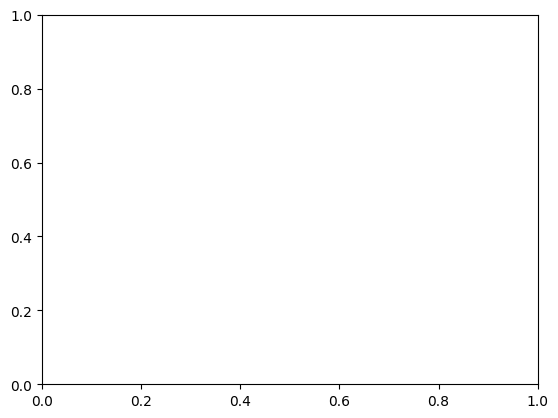

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # für reproduzierbare Ergebnisse

# Erszeugung der Anzahl an verkauften Mensaessen pro Semester
trend = 850 + 20 * np.arange(1, 31)
noise = np.random.normal(loc=0, scale=20, size=np.arange(1, 31).shape)
Mensaessen = trend + noise

# Plotten der gemessenen Daten ohne Regression
Semester = np.arange(1, 30)
plt.scatter(Semester, Mensaessen)
plt.xlabel("Mensaessen")
plt.ylabel("Semester")
plt.title("Anzahl der verkauften Mensaessen über die letzten 30 Semester")
plt.show()

:::{admonition} Hinweis
:class: note dropdown
Stimme die Dimensionen der zu plottenden Daten überein?
:::

:::{admonition} Lösung
:class: tip dropdown

``` python
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # für reproduzierbare Ergebnisse

# Erszeugung der Anzahl an verkauften Mensaessen pro Semester 
trend = 850 + 20 * np.arange(1,31)
noise = np.random.normal(loc=0, scale=20, size=np.arange(1,31).shape)  
Mensaessen = trend + noise

# Plotten der gemessenen Daten ohne Regression
Semester = np.arange(1,31)
plt.scatter(Semester, Mensaessen)
plt.xlabel('Semester')  
plt.ylabel('Mensaessen')  
plt.title('Anzahl der verkauften Mensaessen über die letzten 30 Semester')
plt.show()
```
:::

Nun möchten wir eine lineare Regressionsgerade erzeugen. Dazu normieren wir die Daten zunächst und führen dann die Regression durch. Leider haben sich auch hier Fehler eingeschlichen. 

:::{admonition} Aufgabe 1.2
Finden Sie die Fehler in dem Codeausschnitt und verbessern Sie diese. 
:::

In [ ]:
# Normalisiere die Daten
Mensaessen_norm = np.max(Mensaessen) / Mensaessen 

# Dürchführung der Regression
Grad = 2 
Koeff = np.polyfit(Semester, Mensaessen_norm, Grad)
polynomial = np.poly1d(Koeff)
Regression_Mensaessen = polynomial(Semester)
plt.scatter(Semester, Mensaessen_norm)
plt.plot(Semester, Regression_Mensaessen, color='r')
plt.xlabel('Semester')
plt.ylabel('Mensaessen')
plt.title('Regression der verkauften Mensaessen über die letzten 30 Semester')
plt.show()


:::{admonition} Hinweis
:class: note dropdown
Werden die Daten korrekt normiert?
:::

:::{admonition} Lösung
:class: tip dropdown

``` python
# Normalisiere die Daten
Mensaessen_norm = Mensaessen / np.max(Mensaessen)

# Dürchführung der Regression
Grad = 2 
Koeff = np.polyfit(Semester, Mensaessen_norm, Grad)
polynomial = np.poly1d(Koeff)
Regression_Mensaessen = polynomial(Semester)
plt.scatter(Semester, Mensaessen_norm)
plt.plot(Semester, Regression_Mensaessen, color='r')
plt.xlabel('Semester')
plt.ylabel('Mensaessen')
plt.title('Regression der verkauften Mensaessen über die letzten 30 Semester')
plt.show()
```
:::

## Funktionen nach Fehlern durchgehen

Auch Funktionen können Fehler enthalten. Die Fehlersuche erfolgt hier sehr ähnlich, allerdings muss man die Funktion zunächst aufrufen. Um zu testen, ob die Funktion das tut, was sie tun soll, können Sie Minimalbeispiele erzeugen und die Ausgabe der Funktion mit dem erwünschten Ergebnis vergleichen. 
So stellen Sie sicher, dass die Funktion auch die richtigen Ergenisse erzeugt, wenn die handschriftliche Rechnung zu aufwändig wäre. 

Dieses Vorgehen werden wir anhand einer einfachen Aufgabe testen. Dazu erstellen wir eine Funktion, die gewichtete Scores für verschiedene Produkten berechnet. Jedes Produkt hat eine Reihe von Werten, und diese Werte werden mit einem Gewichtsvektor multipliziert, um den Score jedes Produkts zu berechnen. Die Werte umfassen verschiedene Produktmerkmale. Die Produktinformationen sind in der folgenden Tabelle dargestellt:

:::{list-table}
:header-rows: 1

* - ID
  - Qualität
  - Design
  - Größe
  - Komfort
  - Preis (€)
  - Beliebtheit
* - 1
  - 90
  - 85
  - 30
  - 80
  - 500
  - 1200
* - 2
  - 80
  - 90
  - 20
  - 85
  - 200
  - 1500
* - 3
  - 85
  - 80
  - 25
  - 90
  - 1000
  - 800
* - 4
  - 70
  - 75
  - 40
  - 75
  - 250
  - 500
* - 5
  - 95
  - 90
  - 15
  - 97
  - 400
  - 1300
* - 6
  - 97
  - 80
  - 35
  - 80
  - 300
  - 1200
* - 7
  - 80
  - 85
  - 30
  - 85
  - 500
  - 1400
* - 8
  - 75
  - 78
  - 28
  - 85
  - 350
  - 1100
* - 9
  - 88
  - 82
  - 32
  - 88
  - 600
  - 1600
* - 10
  - 76
  - 82
  - 30
  - 80
  - 350
  - 1100
:::

Entsprechend dieser Tabelle ergibt sich die Matrix $\mathbf{P}$ mit der Sie im folgenden arbeiten werden:

$$
\mathbf{P} = \begin{pmatrix}
1 & 90 & 85 & 30 & 80 & 500 & 1200 \\
2 & 80 & 90 & 20 & 85 & 200 & 1500 \\
  &    &    & \vdots &   &   & \\
10 & 76 & 82 & 30 & 80 & 350 & 1100
\end{pmatrix}
$$

Die Einträge der Matrix $\mathbf{P}$ sind wie folgt zu verstehen:
- Jede Zeile repräsentiert ein Produkt.
- Die erste Spaten enthält die Produktnummern.
- Die Spalten $2$ bis $7$ codieren verschiedene Merkmale des Produkts wie zum Beispiel: Durchschnittsbewertung, Verkaufszahlen, Retourenquote, Preis-Leistungsverhältnis, Anzahl der Bewertungen und Lagerbestand.
 
Die Gewichtsmatrix, die für die Berechnung des Scores verwendet wird, ist gegeben durch:

$$
\mathbf{w} = \begin{pmatrix}
0.4 & 0.25 & -0.15 & 0.15 & 0.05 & 0.05\\
\end{pmatrix}
$$

Der Score soll basierend auf den normierten Werten berechnet werden, das heißt jedes Merkmal wird durch den maximalen Wert des Merkmals geteilt.
Daraus ergibt sich beispielshaft der Score für das erste Produkt

:::{math}
\begin{align}
\text{Score}_1 = & \left(\frac{90}{97} \cdot 0.4\right) 
  + \left(\frac{85}{90} \cdot 0.25\right) 
  + \left(\frac{30}{40} \cdot (-0.15)\right) \\
  & + \left(\frac{80}{97} \cdot 0.15\right) 
  + \left(\frac{500}{1000} \cdot 0.05\right) 
  + \left(\frac{1200}{1600} \cdot 0.05\right) 
  = 0.681.
\end{align}
:::

Sie haben bereits einen Codevorschlag erhalten und sollen diesen auf Korrektheit prüfen und gegebenenfalls auftretende Fehler beheben. Zunächst definieren wir aber die entsprechende Matrix $\mathbf{P}$ als das Array $\texttt{products}$ und die Gewichte $\mathbf{w}$ als das Array $\texttt{weights}$.


In [ ]:
import numpy as np

products = np.array([
    [1, 90, 85, 30, 80, 500, 1200],
    [2, 80, 90, 20, 85, 200, 1500],
    [3, 85, 80, 25, 90, 1000, 800],
    [4, 70, 75, 40, 75, 250, 500],
    [5, 95, 90, 15, 97, 400, 1300],
    [6, 97, 80, 35, 80, 300, 1200],
    [7, 80, 85, 30, 85, 500, 1400],
    [8, 75, 78, 28, 85, 350, 1100],
    [9, 88, 82, 32, 88, 600, 1600],
    [10, 76, 82, 30, 80, 350, 1100]
], dtype=float)

# Gewichtungen (für jedes Merkmal)
weights = np.array([0.4, 0.25, -0.15, 0.15, 0.05, 0.05])

::::{tab-set} 

:::{tab-item} Aufgabe 2.1
Testen Sie zunächst, ob der Code für das erste Produkt mit den ersten drei Merkmalen richtig funktioniert. Passen Sie den Code eventuell so an, dass der Score für dieses Produkt richtig berechnet wird.
:::

:::{tab-item} Aufgabe 2.2
Wiederholen Sie das Vorgehen mit den ersten zwei Produkten und den ersten drei Merkmalen. Korrigieren Sie den Code, sodass er für dieses Beispiel korrekt funktioniert.
:::

:::{tab-item} Aufgabe 2.3
Testen Sie nun die ersten beiden Produkte mit allen Merkmalen. Fällt Ihnen noch ein Fehler auf? Falls ja, beheben Sie diesen. Danach können Sie alle Produkte als Eingabe für die Funktion ausprobieren.  
:::

::::


In [ ]:
def score_berechnung(P, w):
    """
    Berechnet die gewichteten Scores für Produkte.
    EINGABE:
     - P: numpy Array mit Produktinformationen (erste Spalte sind Nummern, restliche Spalten sind Merkmale)
     - w: numpy Array mit Gewichtungen für jedes Merkmal
    AUSGABE:
     - scores: numpy Array mit Produktnummern und gewichteten Scores
    """
    
    ids = P[:, 0]  # Produktnummern
    values = P[:, 1:]  # Merkmale

    # Normalisierung der Merkmale
    for i in range(values.shape[1]):
        values[:, i] = values[:, i] / values[:, i]

    # Berechnung der Scores mit einer Schleife
    scores = np.zeros(len(ids))
    for i in range(1):
        for j in range(len(w)):
            scores[i] = scores[i] + values[i, j] * w[i]  

    # Kombiniere Produktnummern mit Scores
    product_scores = np.column_stack((ids, scores))

    return product_scores


# Ihr Code 
product_scores = score_berechnung(....) # hier Test-Daten übergeben

# Ausgabe der Produktnummern und Scores
for product, score in product_scores:
    print(f"Produkt {int(product)}: {score:.2f}")

:::{admonition} Hinweis A2.1
:class: note dropdown
Wurden alle Indizes richtig gesetzt?
:::

:::{admonition} Hinweis A2.2
:class: note dropdown
Bei der Normierung werden für untetschiedliche Produkte durch unterschiedliche Werte geteilt. Ist das sinnvoll? Laufen die Schleifen über die richtigen Werte?
:::


:::{admonition} Lösung A2.1
:class: tip dropdown

``` python
def score_berechnung(P, w):
    """
    Berechnet die gewichteten Scores für Produkte.
    EINGABE:
     - P: numpy Array mit Produktinformationen (erste Spalte sind Nummern, restliche Spalten sind Merkmale)
     - w: numpy Array mit Gewichtungen für jedes Merkmal
    AUSGABE:
     - scores: numpy Array mit Produktnummern und gewichteten Scores
    """

    ids = P[:, 0]  # Produktnummern
    values = P[:, 1:]  # Merkmale

    for i in range(values.shape[1]):
        values[:, i] = values[:, i] / values[:, i]

    scores = np.zeros(len(ids))  
    for i in range(1):
        for j in range(len(w)):
            scores[i] += values[i, j] * w[i]  

    product_scores = np.column_stack((ids, scores))

    return product_scores

# Beispiel-Daten für die ersten 3 Merkmale
products_test = products[0, :4]
weights_test = weights[:3]

product_scores = score_berechnung(products_test, weights_test)

# Ausgabe der Produktnummern und Scores
for product, score in product_scores:
    print(f"Produkt {int(product)}: {score:.2f}")
```
:::

:::{admonition} Lösung A2.2
:class: tip dropdown

``` python
def score_berechnung(P, w):
    """
    Berechnet die gewichteten Scores für Produkte.
    EINGABE:
     - P: numpy Array mit Produktinformationen (erste Spalte sind Nummern, restliche Spalten sind Merkmale)
     - w: numpy Array mit Gewichtungen für jedes Merkmal
    AUSGABE:
     - scores: numpy Array mit Produktnummern und gewichteten Scores
    """
    ids = P[:, 0]  # Produktnummern
    values = P[:, 1:]  # Merkmale

    # Normalisierung der Merkmale
    for i in range(values.shape[1]):
        values[:, i] = values[:, i] / np.max(values[:, i])

    # Berechnung der Scores mit einer Schleife
    scores = np.zeros(len(ids))  
    for i in range(len(ids)):
        for j in range(len(w)):
            scores[i] = scores[i] + values[i, j] * w[j]  

    # Kombiniere Produktnummern mit Scores
    product_scores = np.column_stack((ids, scores))

    return product_scores

# Beispiel-Daten
products_test = products[0:1, :4]
weights_test = weights[:3]

product_scores = score_berechnung(products_test, weights_test)

# Ausgabe der Produktnummern und Scores
for product, score in product_scores:
    print(f"Produkt {int(product)}: {score:.2f}")
```
:::

:::{admonition} Lösung A2.3
:class: tip dropdown

``` python
def score_berechnung(P, w):
    """
    Berechnet die gewichteten Scores für Produkte.
    EINGABE:
     - P: numpy Array mit Produktinformationen (erste Spalte sind Nummern, restliche Spalten sind Merkmale)
     - w: numpy Array mit Gewichtungen für jedes Merkmal
    AUSGABE:
     - scores: numpy Array mit Produktnummern und gewichteten Scores
    """
    ids = P[:, 0]  # Produktnummern
    values = P[:, 1:]  # Merkmale

    # Normalisierung der Merkmale
    for i in range(values.shape[1]):
        values[:, i] = values[:, i] / np.max(values[:, i])

    # Berechnung der Scores mit einer Schleife
    scores = np.zeros(len(ids)) 
    for i in range(len(ids)):
        for j in range(len(w)):
            scores[i] = scores[i] +  values[i, j] * w[j]  

    # Kombiniere Produktnummern mit Scores
    product_scores = np.column_stack((ids, scores))

    return product_scores

# Beispiel-Daten
products_test = products[0:1, :]
weights_test = weights

product_scores = score_berechnung(products_test, weights_test)

# Ausgabe der Produktnummern und Scores
for product, score in product_scores:
    print(f"Produkt {int(product)}: {score:.2f}")
```
:::